In [25]:
import numpy as np
import mne
from mne.datasets import sample
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_raw.fif'
raw = mne.io.read_raw_fif(raw_fname,preload=True) ## 注意，preload要为True
print(raw)

Opening raw data file /home/reallocing/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 376 x 166800 (277.7 sec), ~482.3 MB, data loaded>


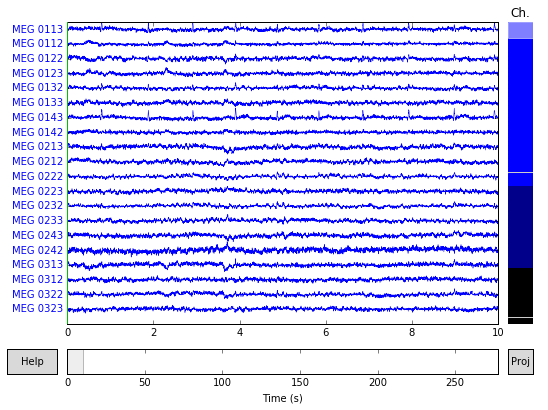

In [3]:
raw.plot();

l_freq and h_freq are the frequencies below which and above which, respectively, to filter out of the data. Thus the uses are:
```
l_freq < h_freq: band-pass filter
l_freq > h_freq: band-stop filter
l_freq is not None and h_freq is None: high-pass filter
l_freq is None and h_freq is not None: low-pass filter
```

#### 给所有通道滤波

Setting up band-pass filter from 1 - 40 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 1983 samples (3.302 sec) selected


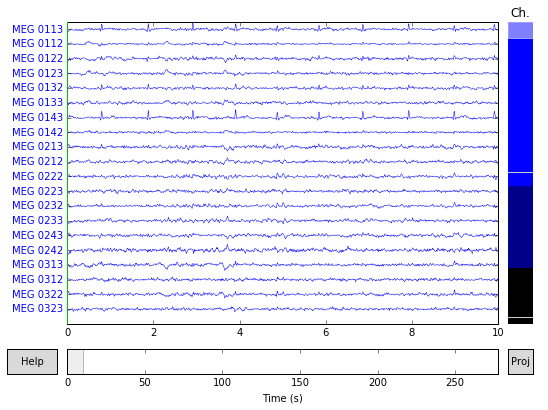

In [11]:
raw.filter(l_freq=1,h_freq=40, 
           l_trans_bandwidth='auto', h_trans_bandwidth='auto')
raw.plot();

#### 选择特定的channels进行滤波

[ 75  76  77  78  79  80 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 225 226 227 246 247 248 249 250 251 252 253 254 255 256 257
 279 281]
(38, 166800)
Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Setting up band-pass filter from 1 - 40 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 1983 samples (3.302 sec) selected
Overwriting existing file.
Writing /home/reallocing/Code/MNE/sample_filter_raw.fif
Closing /home/reallocing/Code/MNE/sample_filter_raw.fif [done]
Opening raw data file /home/reallocing/Code/MNE/sample_filter_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0


<ipython-input-45-7b79a6761f36>:11: RuntimeWarning: Projection vector "PCA-v1" has magnitude 0.24 (should be unity), applying projector with 13/102 of the original channels available may be dangerous, consider recomputing and adding projection vectors for channels that are eventually used. If this is intentional, consider using info.normalize_proj()
  sample.plot();
<ipython-input-45-7b79a6761f36>:11: RuntimeWarning: Projection vector "PCA-v2" has magnitude 0.61 (should be unity), applying projector with 13/102 of the original channels available may be dangerous, consider recomputing and adding projection vectors for channels that are eventually used. If this is intentional, consider using info.normalize_proj()
  sample.plot();
<ipython-input-45-7b79a6761f36>:11: RuntimeWarning: Projection vector "PCA-v3" has magnitude 0.24 (should be unity), applying projector with 13/102 of the original channels available may be dangerous, consider recomputing and adding projection vectors for channe

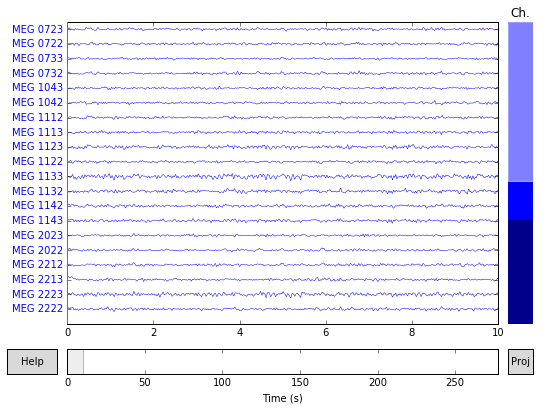

In [45]:
raw = mne.io.read_raw_fif(raw_fname,preload=True) ## 注意，preload要为True

selection = mne.read_selection('Right-parietal')
picks = mne.pick_types(raw.info,meg=True,eeg=False,eog=False,ecg=False,
                      stim=False,selection=selection)
print(np.array(raw[picks][0]).shape)
raw.filter(l_freq=1,h_freq=40, picks=picks,
           l_trans_bandwidth='auto', h_trans_bandwidth='auto')
raw.save('sample_filter_raw.fif',overwrite=True,picks=picks)
sample = mne.io.read_raw_fif('sample_filter_raw.fif')
# raw.plot(highpass=1, lowpass=40);
sample.plot();

<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 11 x 166800 (277.7 sec), ~17.0 MB, data loaded>
Setting up band-pass filter from 1 - 40 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 1983 samples (3.302 sec) selected


<ipython-input-21-8f409cb477bc>:6: RuntimeWarning: Projection vector "PCA-v1" has magnitude 0.06 (should be unity), applying projector with 3/102 of the original channels available may be dangerous, consider recomputing and adding projection vectors for channels that are eventually used. If this is intentional, consider using info.normalize_proj()
  sample.plot();
<ipython-input-21-8f409cb477bc>:6: RuntimeWarning: Projection vector "PCA-v2" has magnitude 0.01 (should be unity), applying projector with 3/102 of the original channels available may be dangerous, consider recomputing and adding projection vectors for channels that are eventually used. If this is intentional, consider using info.normalize_proj()
  sample.plot();
<ipython-input-21-8f409cb477bc>:6: RuntimeWarning: Projection vector "PCA-v3" has magnitude 0.25 (should be unity), applying projector with 3/102 of the original channels available may be dangerous, consider recomputing and adding projection vectors for channels tha

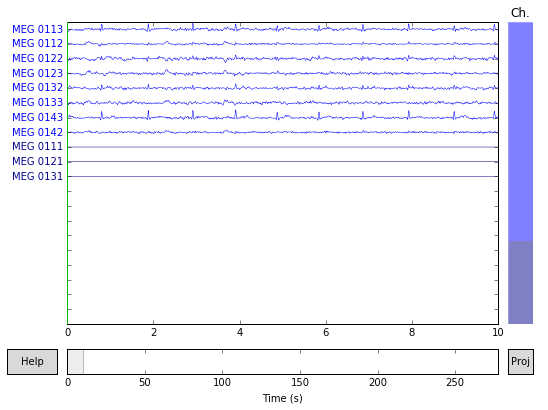

In [21]:
# print(raw.ch_names) # 打印出所有channels
sample = raw.copy().pick_channels([u'MEG 0113', u'MEG 0112', u'MEG 0111', u'MEG 0122', u'MEG 0123', u'MEG 0121', u'MEG 0132', u'MEG 0133', u'MEG 0131', u'MEG 0143', u'MEG 0142'])
print(sample)
sample.filter(l_freq=1,h_freq=40,
           l_trans_bandwidth='auto', h_trans_bandwidth='auto')
sample.plot();